In [113]:
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random


def return_rate (date1, date2, date3, date4, ticker):
    df = stock.get_etf_ohlcv_by_date(date1, date2, ticker)
    df_nav = df["NAV"]
    list_df_nav = list(df_nav)
    series_df_1 = pd.Series(list_df_nav)
    
    df2 = stock.get_etf_ohlcv_by_date(date3, date4, ticker)
    df2_nav = df2["NAV"]
    list_df2_nav = list(df2_nav)
    series_df_2 = pd.Series(list_df2_nav)
    
    return_rate = list((series_df_2 - series_df_1) / series_df_1)
    
    return return_rate


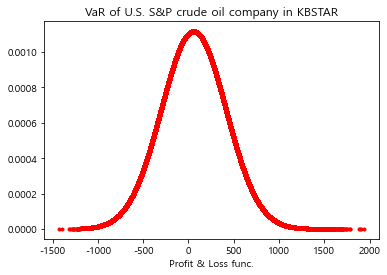

[-713.90944432 -603.62731646 -506.47390341 -391.32569174]


In [145]:
# KBSTAR US S&P Oil&Gas VaR

Oil = return_rate("20210315", "20220315", "20210316","20220316","219390")

Xs = []
x = stock.get_etf_ohlcv_by_date("20220322", "20220322", "219390")
for i in range(0, 1000000):
    X0 = x["NAV"][-1]
    
    r_scenario = random.sample(Oil, 5)
    Xs.append(X0 * np.exp(sum(r_scenario)))

PL_function = Xs - X0

VaR = np.percentile(PL_function, [1, 2.5, 5, 10])

plt.plot(PL_function, stats.norm.pdf(PL_function,
                                     np.nanmean(PL_function),
                                     np.std(PL_function)), '.',
        color = 'red')
plt.title("VaR of U.S. S&P crude oil company in KBSTAR")
plt.xlabel("Profit & Loss func.")
plt.show()
print(VaR)

11907.3
-1764.528989211376


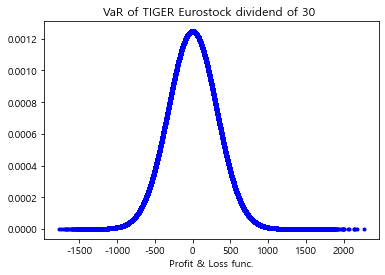

[-801.10759208 -651.55438678 -517.50289838 -371.94559093]


In [148]:
# TIGER 유로스탁 배당 30

Euro = return_rate("20210315", "20220315", "20210316","20220316","245350")

Xs = []
x = stock.get_etf_ohlcv_by_date("20220322", "20220322", "245350")
for i in range(0, 1000000):
    X0 = x["NAV"][-1]
    
    r_scenario = random.sample(Euro, 5)
    Xs.append(X0 * np.exp(sum(r_scenario)))

PL_function = (Xs - X0)
print(X0)
print(min(PL_function))
VaR = np.percentile(PL_function, [1, 2.5, 5, 10], interpolation = 'linear')

plt.plot(PL_function, stats.norm.pdf(PL_function,
                                     np.nanmean(PL_function),
                                     np.std(PL_function)), '.',
        color = 'blue')
plt.xlabel("Profit & Loss func.")
plt.title("VaR of TIGER Eurostock dividend of 30 ")
plt.show()
print(VaR)

In [127]:
print(max(Euro))
print(max(PL_function))

0.09440347736387115
1975.230874613986
